In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, normaltest
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [40]:
df=pd.read_csv("Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [41]:
#Explore the data, list down the unique values in each feature and find its length.
#Perform the statistical analysis and renaming of the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [42]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [43]:
for col in df.columns:
    print(f"column:{col}")
    print(f"unique values:",df[col].unique())
    print(f"number of unique values:",df[col].nunique())
    print("-" * 40)

column:Company
unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
number of unique values: 6
----------------------------------------
column:Age
unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
number of unique values: 29
----------------------------------------
column:Salary
unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
number of unique values: 40
----------------------------------------
column:Place
unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
number of unique values: 11
----------------------------------------
column:Country
unique values: ['India'

In [44]:
f=df.corr(numeric_only=True)
f

,Age,Salary,Gender
Age,1.000000,0.067533,0.063430
Salary,0.067533,1.000000,0.655525
Gender,0.063430,0.655525,1.000000


In [45]:
#Data Cleaning: (Score : 2)

#Remove all duplicate rows.
#Find the outliers.
#Replace the value 0 in age as NaN
#Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


# correcting the index numbers
df.index = range(1,len(df)+1)
df.head(10)

,Company,Age,Salary,Place,Country,Gender
1,TCS,20.0,NaN,Chennai,India,0
2,Infosys,30.0,NaN,Mumbai,India,0
3,TCS,35.0,2300.0,Calcutta,India,0
4,Infosys,40.0,3000.0,Delhi,India,0
5,TCS,23.0,4000.0,Mumbai,India,0
6,Infosys,NaN,5000.0,Calcutta,India,0
7,TCS,NaN,6000.0,Chennai,India,1
8,Infosys,23.0,7000.0,Mumbai,India,1
9,TCS,34.0,8000.0,Calcutta,India,1
10,CTS,45.0,9000.0,Delhi,India,0


In [46]:
#Find the missing and inappropriate values, treat them appropriately
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [47]:
df['Company']=df['Company'].replace({'Infosys Pvt Lmt':'Infosys','Tata Consultancy Services':'TCS','CTS':'TCS'})
df.tail(100)

,Company,Age,Salary,Place,Country,Gender
49,TCS,43.0,NaN,Mumbai,India,0
50,TCS,19.0,1234.0,Cochin,India,0
51,Infosys,41.0,3000.0,Chennai,India,0
52,NaN,24.0,3000.0,Mumbai,India,0
53,Infosys,21.0,3030.0,Calcutta,India,0
...,...,...,...,...,...,...
144,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,22.0,8787.0,Calcutta,India,1
146,Infosys,44.0,4034.0,Delhi,India,1
147,TCS,33.0,5034.0,Mumbai,India,1


In [48]:
df = df.dropna(subset=['Company'])
df.tail(30)

,Company,Age,Salary,Place,Country,Gender
116,Infosys,22.0,8787.0,Calcutta,India,0
117,TCS,33.0,8787.0,NaN,India,1
118,TCS,44.0,9876.0,NaN,India,1
119,TCS,22.0,NaN,NaN,India,0
120,TCS,33.0,1089.0,Noida,India,0
121,TCS,44.0,NaN,Hyderabad,India,0
122,TCS,0.0,1234.0,Calcutta,India,0
123,Infosys,44.0,3234.0,Mumbai,India,0
125,Infosys,22.0,8787.0,Calcutta,India,1
126,TCS,33.0,5654.0,NaN,India,1


In [49]:
#Replace the value 0 in age as NaN

df['Age']=df['Age'].replace({0:'NaN'})
df.head(10)

,Company,Age,Salary,Place,Country,Gender
1,TCS,20.0,NaN,Chennai,India,0
2,Infosys,30.0,NaN,Mumbai,India,0
3,TCS,35.0,2300.0,Calcutta,India,0
4,Infosys,40.0,3000.0,Delhi,India,0
5,TCS,23.0,4000.0,Mumbai,India,0
6,Infosys,NaN,5000.0,Calcutta,India,0
7,TCS,NaN,6000.0,Chennai,India,1
8,Infosys,23.0,7000.0,Mumbai,India,1
9,TCS,34.0,8000.0,Calcutta,India,1
10,TCS,45.0,9000.0,Delhi,India,0


In [50]:
df.describe()

,Salary,Gender
count,119.000000,140.000000
mean,5276.159664,0.228571
std,2567.645046,0.421420
min,1089.000000,0.000000
25%,3030.000000,0.000000
50%,5000.000000,0.000000
75%,8000.000000,0.000000
max,9876.000000,1.000000


In [51]:
df.dtypes

Company     object
Age         object
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [52]:
#convert object to numeric
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
df.describe()

,Age,Salary,Gender
count,118.000000,119.000000,140.000000
mean,32.194915,5276.159664,0.228571
std,9.134567,2567.645046,0.421420
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [53]:
df.isnull().sum()

Company     0
Age        22
Salary     21
Place      13
Country     0
Gender      0
dtype: int64

Text(0.5, 1.0, 'Salary  outlier')

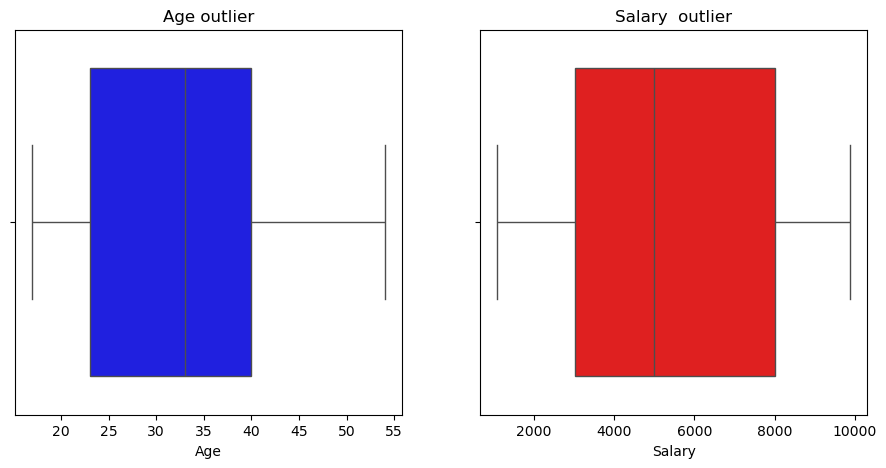

In [54]:
# find outliers
fig,axes =plt.subplots(1,2,figsize=(11,5))
sns.boxplot(x=df['Age'],ax=axes[0],color='blue').set_title('Age outlier')
sns.boxplot(x=df['Salary'],ax=axes[1],color='red').set_title('Salary  outlier')


In [55]:
df.describe()

,Age,Salary,Gender
count,118.000000,119.000000,140.000000
mean,32.194915,5276.159664,0.228571
std,9.134567,2567.645046,0.421420
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


Text(0.5, 1.0, 'Salary  outlier')

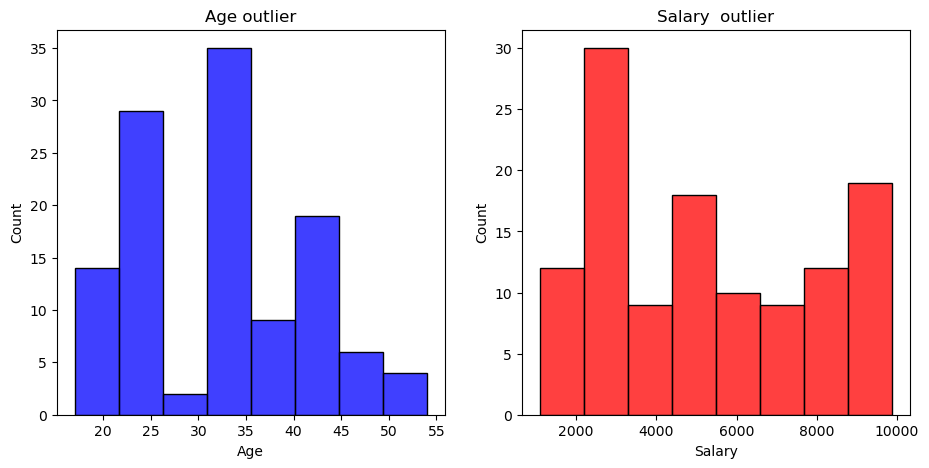

In [56]:
fig,axes =plt.subplots(1,2,figsize=(11,5))
sns.histplot(x=df['Age'],ax=axes[0],color='blue').set_title('Age outlier')
sns.histplot(x=df['Salary'],ax=axes[1],color='red').set_title('Salary  outlier')


In [57]:
df['Age'].mean()

32.19491525423729

In [58]:
# replace the null values with mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(10)

,Company,Age,Salary,Place,Country,Gender
1,TCS,20.000000,NaN,Chennai,India,0
2,Infosys,30.000000,NaN,Mumbai,India,0
3,TCS,35.000000,2300.0,Calcutta,India,0
4,Infosys,40.000000,3000.0,Delhi,India,0
5,TCS,23.000000,4000.0,Mumbai,India,0
6,Infosys,32.194915,5000.0,Calcutta,India,0
7,TCS,32.194915,6000.0,Chennai,India,1
8,Infosys,23.000000,7000.0,Mumbai,India,1
9,TCS,34.000000,8000.0,Calcutta,India,1
10,TCS,45.000000,9000.0,Delhi,India,0


In [59]:
df['Salary'].mean()

5276.1596638655465

In [60]:
df['Salary']=df['Salary'].fillna(df['Salary'].mean())
df.head(10)

,Company,Age,Salary,Place,Country,Gender
1,TCS,20.000000,5276.159664,Chennai,India,0
2,Infosys,30.000000,5276.159664,Mumbai,India,0
3,TCS,35.000000,2300.000000,Calcutta,India,0
4,Infosys,40.000000,3000.000000,Delhi,India,0
5,TCS,23.000000,4000.000000,Mumbai,India,0
6,Infosys,32.194915,5000.000000,Calcutta,India,0
7,TCS,32.194915,6000.000000,Chennai,India,1
8,Infosys,23.000000,7000.000000,Mumbai,India,1
9,TCS,34.000000,8000.000000,Calcutta,India,1
10,TCS,45.000000,9000.000000,Delhi,India,0


In [61]:
df.isnull().sum()

Company     0
Age         0
Salary      0
Place      13
Country     0
Gender      0
dtype: int64

In [62]:
#Data Analysis
#Filter the data with age >40 and salary<5000
#Plot the chart with age and salary
#Count the number of people from each place and represent it visually


In [63]:
df_filtered=df[(df['Age']>40) & (df['Salary']<5000)]
df_filtered

,Company,Age,Salary,Place,Country,Gender
22,Infosys,50.0,3184.0,Delhi,India,0
33,Infosys,45.0,4034.0,Calcutta,India,0
40,Infosys,41.0,3000.0,Mumbai,India,0
51,Infosys,41.0,3000.0,Chennai,India,0
58,Infosys,51.0,3184.0,Hyderabad,India,0
69,Infosys,43.0,4034.0,Mumbai,India,0
76,Infosys,44.0,3000.0,Cochin,India,0
87,Infosys,41.0,3000.0,Delhi,India,0
94,Infosys,54.0,3184.0,Mumbai,India,0
105,Infosys,44.0,4034.0,Delhi,India,0


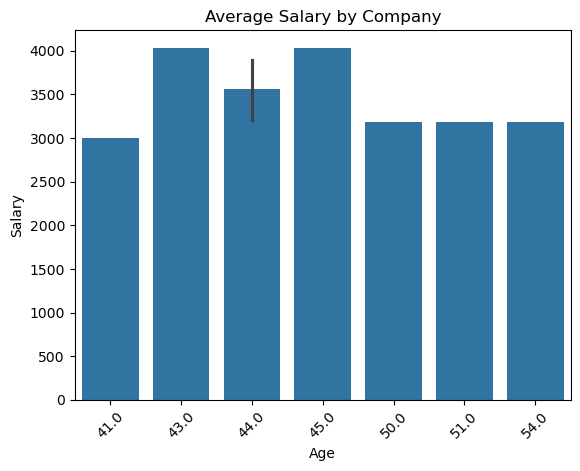

In [64]:
sns.barplot(data=df_filtered, x='Age', y='Salary')
plt.xticks(rotation=45)
plt.title('Average Salary by Company')
plt.show()


In [65]:
place_count=df['Place'].value_counts().reset_index()
place_count.columns = ['place', 'count']
print(place_count)


         place  count
0       Mumbai     36
1     Calcutta     31
2      Chennai     13
3        Delhi     13
4       Cochin     13
5        Noida      7
6    Hyderabad      7
7   Podicherry      3
8         Pune      2
9       Bhopal      1
10      Nagpur      1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Calcutta'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Cochin'),
  Text(5, 0, 'Noida'),
  Text(6, 0, 'Hyderabad'),
  Text(7, 0, 'Podicherry'),
  Text(8, 0, 'Pune'),
  Text(9, 0, 'Bhopal'),
  Text(10, 0, 'Nagpur')])

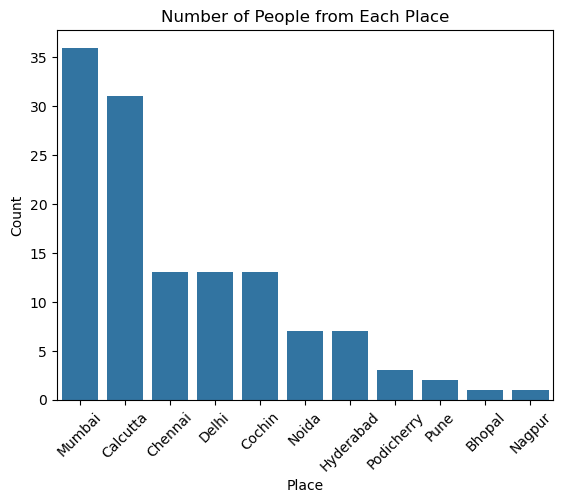

In [66]:
sns.barplot(data=place_count, x='place', y='count')
plt.title("Number of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=45)

In [67]:
#Data Encoding
#Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

le=LabelEncoder()
df['company_encoded']=le.fit_transform(df['Company'])
df['Place_encoded']=le.fit_transform(df['Place'])

df.head(10)

,Company,Age,Salary,Place,Country,Gender,company_encoded,Place_encoded
1,TCS,20.000000,5276.159664,Chennai,India,0,2,2
2,Infosys,30.000000,5276.159664,Mumbai,India,0,1,6
3,TCS,35.000000,2300.000000,Calcutta,India,0,2,1
4,Infosys,40.000000,3000.000000,Delhi,India,0,1,4
5,TCS,23.000000,4000.000000,Mumbai,India,0,2,6
6,Infosys,32.194915,5000.000000,Calcutta,India,0,1,1
7,TCS,32.194915,6000.000000,Chennai,India,1,2,2
8,Infosys,23.000000,7000.000000,Mumbai,India,1,1,6
9,TCS,34.000000,8000.000000,Calcutta,India,1,2,1
10,TCS,45.000000,9000.000000,Delhi,India,0,2,4


In [68]:
df_get_dummies=pd.get_dummies(df['Company'], prefix='Company').astype(int)
df_get_dummies

,Company_Congnizant,Company_Infosys,Company_TCS
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
...,...,...,...
144,0,0,1
145,0,1,0
146,0,1,0
147,0,0,1


In [69]:
df1=pd.concat([df,df_get_dummies], axis=1)
df1

,Company,Age,Salary,Place,Country,Gender,company_encoded,Place_encoded,Company_Congnizant,Company_Infosys,Company_TCS
1,TCS,20.0,5276.159664,Chennai,India,0,2,2,0,0,1
2,Infosys,30.0,5276.159664,Mumbai,India,0,1,6,0,1,0
3,TCS,35.0,2300.000000,Calcutta,India,0,2,1,0,0,1
4,Infosys,40.0,3000.000000,Delhi,India,0,1,4,0,1,0
5,TCS,23.0,4000.000000,Mumbai,India,0,2,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
144,TCS,33.0,9024.000000,Calcutta,India,1,2,1,0,0,1
145,Infosys,22.0,8787.000000,Calcutta,India,1,1,1,0,1,0
146,Infosys,44.0,4034.000000,Delhi,India,1,1,4,0,1,0
147,TCS,33.0,5034.000000,Mumbai,India,1,2,6,0,0,1
